Наш датасет: https://www.kaggle.com/kevalm/movie-imbd-dataset<br>
1. Есть ли зависимость относительной прибыли(прибыль/бюджет) от размера бюджета в фильмах ужасов.<br>
2. Проверка нормальности распределения бюджета по жанру драма<br>
3. Зависимость размера среднего бюджета от категории жанр<br>
4. Кореляция оценки фильма в зависимости от бюджета.<br>
5. Дисперсеонный однофакторный анализ зависимости бюджета фильма от его контент рейтинга<br>



## 1. Есть ли зависимость относительной прибыли(прибыль/бюджет) от размера бюджета в фильмах ужасов.

In [463]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [464]:
df = pd.read_csv('movie_metadata.csv')
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


Для первой задачи нам понадобится 2 столбца "gross" и "budget". Оставим только жанр ужасы в нашем датафрейме, и колонки бюджет и сборы. Так же уберем все фильмы не из USA, так как в низ бюджеты могут быть не в долларах.

In [465]:
df1 = df[df['genres'].str.contains("Horror")]
df1 = df1[df1['country'] == 'USA']
df1 = df1[["gross","budget"]]
df1.describe()

,gross,budget
count,3.280000e+02,4.090000e+02
mean,3.711999e+07,1.827644e+07
std,3.424545e+07,2.383703e+07
min,1.332000e+03,1.400000e+03
25%,1.457812e+07,3.000000e+06
50%,3.059649e+07,1.000000e+07
75%,5.174519e+07,2.500000e+07
max,2.563862e+08,1.900000e+08


Удалим все незаполненные строки, так как они не могут участвовать в нашем подсчете.

In [466]:
df1 = df1.dropna()
df1.describe()

,gross,budget
count,3.190000e+02,3.190000e+02
mean,3.768455e+07,2.221130e+07
std,3.428884e+07,2.536390e+07
min,1.332000e+03,1.000000e+04
25%,1.499401e+07,5.000000e+06
50%,3.069144e+07,1.500000e+07
75%,5.276564e+07,3.000000e+07
max,2.563862e+08,1.900000e+08


Добавим дополнительный столбец с относительной прибылью, это 'сборы / бюджет'.

In [467]:
df1['relative_gross'] = df1['gross'] / df1['budget']

Посмотрим на кореляционную матрицу.

In [468]:
df1.corr()

,gross,budget,relative_gross
gross,1.000000,0.483314,0.163524
budget,0.483314,1.000000,-0.076175
relative_gross,0.163524,-0.076175,1.000000


Мы видим незначительную обратную корреляцию, между бюджетом и относительными сборами. Попробуем убрать выбросы что бы они не мешали нашим подсчетам.

Text(0, 0.5, 'Сборы фильма')

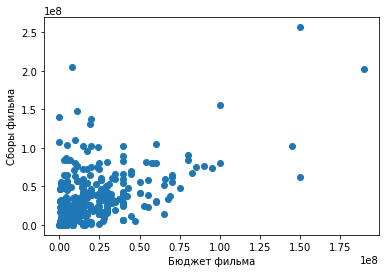

In [469]:
plt.scatter(df1['budget'], df1['gross'])
plt.xlabel('Бюджет фильма')
plt.ylabel('Сборы фильма')

построим boxplot для наших сборов и бюджета

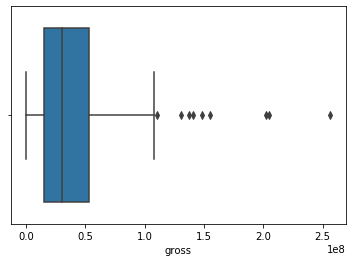

In [470]:
sns.boxplot(df1['gross'])

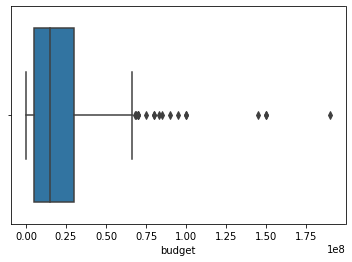

In [471]:
sns.boxplot(df1['budget'])

In [472]:
df1.describe()

,gross,budget,relative_gross
count,3.190000e+02,3.190000e+02,319.000000
mean,3.768455e+07,2.221130e+07,38.472316
std,3.428884e+07,2.536390e+07,424.103050
min,1.332000e+03,1.000000e+04,0.000185
25%,1.499401e+07,5.000000e+06,0.843999
50%,3.069144e+07,1.500000e+07,1.707632
75%,5.276564e+07,3.000000e+07,3.522736
max,2.563862e+08,1.900000e+08,7194.485533


На boxplot мы видим значительное количество выбросов которые могут сильно повлиять на наши подсчеты.<br>
Напишем функцию которая будет избавляться от выбросов по формуле $$\left[ Q_1 - 1.5 \times IQR, \: Q_3 + 1.5 \times IQR \right],$$
где $Q1,Q3$ - первый и третий квартиль $IQR$ — интерквартильное расстояние.

In [473]:
def clear_blowouts(data, *args):
    for column in args:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        data = data[(data[column] > (Q1-1.5*IQR)) & (data[column] < (Q3+1.5*IQR))]
    return data

df_IQR = clear_blowouts(df1, 'gross', 'budget')
df_IQR.describe()
# plt.scatter(df_IQR['budget'], df_IQR['relative_gross'])

,gross,budget,relative_gross
count,2.950000e+02,2.950000e+02,295.000000
mean,3.228014e+07,1.778761e+07,33.392046
std,2.499134e+07,1.561619e+07,419.965028
min,1.332000e+03,1.000000e+04,0.000185
25%,1.433931e+07,5.000000e+06,0.871103
50%,2.850160e+07,1.500000e+07,1.754481
75%,4.672790e+07,2.700000e+07,3.522736
max,1.079173e+08,6.600000e+07,7194.485533


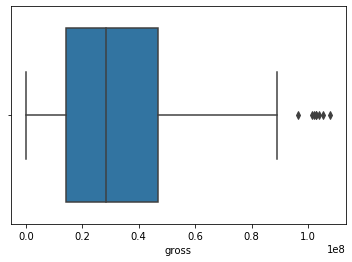

In [474]:
sns.boxplot(df_IQR['gross'])

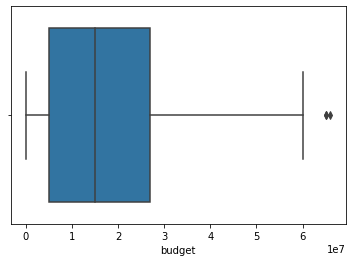

In [475]:
sns.boxplot(df_IQR['budget'])

По результатам получается что выбросы не особо мешали.

In [476]:
df_IQR.corr()

,gross,budget,relative_gross
gross,1.000000,0.314439,0.181339
budget,0.314439,1.000000,-0.085937
relative_gross,0.181339,-0.085937,1.000000


Мы видим незначительню обратную коррелсяцию относительной прибыли от бюджета порядка $-0.086$.  Получается, что чем больше бюджет - тем меньше можно сделать "иксов" относительно этого бюджета, что в обещем выглядит разумно. Но при этом легче снять дорогой фильм, чем много фильмов с суммарно таким же бюджетом. Так что для авторов выгодно вкладывать деньги в картины, что бы получить разово больше прибыли.

Проведем тетс на значимость полученной корелляции.<br>
Нулевая гипотеза будет: коэффициент корреляции равен 0. Альтернативная гипотеза двухсторонняя, так как коэффийиент корреляции лежит $[-1,1]$.<br>
Мы применяем t-статистику и распределение Стьюдента с $df = n - 2$:
$$t = r \cdot \frac {\sqrt{n-2}}{\sqrt{(1-r^2)}}$$
где r коэффициент корреляции Пирсона, n - размер нашей выборки.
Возьмем уровень значимости $\alpha=0.05$, $r=-0.086$


In [477]:
def statistics(r, n):
    return r * np.math.sqrt(n - 2) / np.math.sqrt(1 - r**2)
r = -0.086
n = df_IQR.shape[0]
t = statistics(r,n)
print(f'Наша t-статистика: {t}')


Наша t-статистика: -1.4775570244592495


In [478]:
alpha = 0.05
t1 = stats.t.ppf(alpha / 2, df=n-2)
t2 = stats.t.ppf(1 - alpha/2, df=n-2)
print(f"Наша получившаяся критическая область: (-inf;{t1}),({t2};+inf)")

Наша получившаяся критическая область: (-inf;-1.9680934526834821),(1.9680934526834817;+inf)


Наша статистика лежит вне критической области, а значит наша нулевя гипотеза верна и r=0 для нашего уровня значимости. Так что все выводы сделанные раньше про малую обратную коррелаяцию неверны. Да и умные мысли приходят поздно, тут еще есть проблемма того, что в разные годы доллар имел разную покупательную способность, так что не очень хорошая идея сравнивать бюджет фильма 1930 года и 2015.

## 2. Проверка нормальности распределения бюджета по жанру драма.

Выберем жанр драмма из USA, очистим от нулей и выбросов.

In [479]:
df2 = df[df['genres'].str.contains("Drama")]
df2 = df2[df2['country'] == 'USA']
df2 = df2[['budget','genres']]
df2.describe()

,budget
count,1.673000e+03
mean,2.694489e+07
std,2.989085e+07
min,1.400000e+03
25%,5.500000e+06
50%,1.800000e+07
75%,3.800000e+07
max,2.000000e+08


In [480]:
df2.dropna()

,budget,genres
22,200000000.0,Action|Adventure|Drama|History
26,200000000.0,Drama|Romance
61,200000000.0,Animation|Drama|Family|Fantasy
63,180000000.0,Action|Adventure|Drama|Romance
66,185000000.0,Action|Crime|Drama|Thriller
...,...,...
5033,7000.0,Drama|Sci-Fi|Thriller
5035,7000.0,Action|Crime|Drama|Romance|Thriller
5036,3250.0,Crime|Drama
5037,9000.0,Comedy|Drama


In [481]:
df2 = clear_blowouts(df2, 'budget')

Построим нормализованную гистограмму нашей выборки по бюджету, и наложим на нее функцию плотности нормального распределения с выборочным средним и выборочным среднеквадратичным отклонением.  Наша функция плотности $$f(x) = \dfrac{1}{\sqrt{2 \pi \sigma^2}} \cdot \exp \left(- \frac{(x - \mu)^2}{2 \sigma^2} \right)$$

Параметры $\mu$ и $\sigma$ задают, соответственно, математическое ожидание и среднее квадратическое отклонение случайной величины:
$$M(X) = \mu, \:\: D(X) = \sigma^2$$

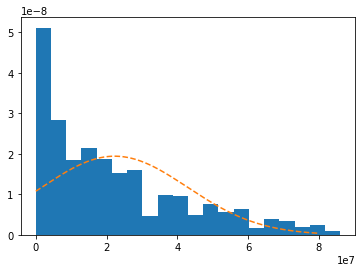

In [482]:
def pdf_normal(loc: float, scale: float, x: float) -> float:
    """Функция плотности для нормального распределения.
    """
    return np.exp(- ((x - loc) ** 2) / (2 * scale ** 2)) / (scale * np.sqrt(2 * np.pi))

sigma = df2['budget'].std()
mean = df2['budget'].mean()
plt.hist(df2['budget'], bins=20, density=True)
ox = np.arange(0, 80000000, 500)
oy = np.array([pdf_normal(loc=mean, scale=sigma, x=i) for i in ox])
plt.plot(ox,oy, linestyle='dashed')

По получившемуся графику мы видим, что бюджет не распределен нормально. Количество фильмов падает пропорционально бюджету. Возможно будут распределены фильмы от одной студии. Где будет средний бюджет фильма, и относительно него уже будет разброс. В данной выборке просто фильмов дешевле - больше, чем дороже тем реже встречаются.

## 3. Зависимость размера среднего бюджета от категории жанр


In [483]:
df.genres.unique()[:20]

array(['Action|Adventure|Fantasy|Sci-Fi', 'Action|Adventure|Fantasy',
       'Action|Adventure|Thriller', 'Action|Thriller', 'Documentary',
       'Action|Adventure|Sci-Fi', 'Action|Adventure|Romance',
       'Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance',
       'Adventure|Family|Fantasy|Mystery', 'Action|Adventure',
       'Action|Adventure|Western', 'Action|Adventure|Family|Fantasy',
       'Action|Adventure|Comedy|Family|Fantasy|Sci-Fi',
       'Adventure|Fantasy', 'Action|Adventure|Drama|History',
       'Adventure|Family|Fantasy', 'Action|Adventure|Drama|Romance',
       'Drama|Romance', 'Action|Adventure|Sci-Fi|Thriller',
       'Action|Adventure|Fantasy|Romance'], dtype=object)

In [484]:
pd.value_counts(df.genres.unique())

Action|Adventure|History        1
Thriller|Western                1
Drama|Music|Musical|Romance     1
Comedy|Drama|Family|Musical     1
Adventure|Drama|Fantasy         1
                               ..
Adventure|Mystery|Thriller      1
Horror|Sci-Fi|Short|Thriller    1
Comedy|Crime|Sport              1
Crime|Drama|Film-Noir           1
Crime|Film-Noir|Thriller        1
Length: 914, dtype: int64

Тут достаточно сложно провести исследование, так как фильмы почти никогда не бывают в едином жанре. У нас получается 900 уникальных вариаций суммарных жанров. Для выборки в 5000 фильмов такую статистику смотреть бесполезно.

## 4. Кореляция оценки фильма в зависимости от бюджета.

Для начала проверим распределение оценок фильмам(оно точно должна быть нормальным). Проведем все теже действия, что и во втором пункте.

In [485]:
df3 = df[['imdb_score','budget']]
df3.describe()

,imdb_score,budget
count,5043.000000,4.551000e+03
mean,6.442138,3.975262e+07
std,1.125116,2.061149e+08
min,1.600000,2.180000e+02
25%,5.800000,6.000000e+06
50%,6.600000,2.000000e+07
75%,7.200000,4.500000e+07
max,9.500000,1.221550e+10


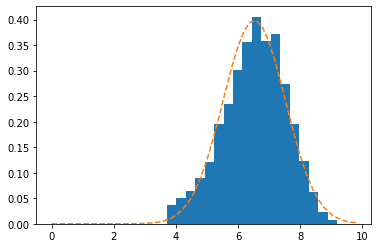

In [486]:
df3 = clear_blowouts(df3, 'imdb_score')
sigma = df3['imdb_score'].std()
mean = df3['imdb_score'].mean()
plt.hist(df3['imdb_score'], bins=18, density=True)
ox = np.arange(0, 10, 0.2)
oy = np.array([pdf_normal(loc=mean, scale=sigma, x=i) for i in ox])
plt.plot(ox,oy, linestyle='dashed')

In [487]:
df3.corr()

,imdb_score,budget
imdb_score,1.000000,0.025633
budget,0.025633,1.000000


Как мы видим на графике, оценки распределены нормально. Причем корреляция Пирсона говорит о том, что оценка фильма практически независит от бюджета. Качество картины не зависит от потраченых на нее денег.

## 5. Дисперсеонный анализ зависимости бюджета фильма от его рейтинга.

G (General Audiences) – All ages admitted.<br>
PG (Parental Guidance Suggested) – Some material may not be suitable for children.<br>
PG-13 (Parents Strongly Cautioned) – Some material may be inappropriate for children under 13.<br>
R (Restricted) – Under 17 requires accompanying parent or adult guardian.<br>
NC-17 (Adults Only) – No one 17 and under admitted.

In [488]:
df5 = df[df['country'] == 'USA']
df5 = df5[['content_rating', 'budget']]
pd.value_counts(df5['content_rating'])

R            1571
PG-13        1208
PG            558
G              85
Not Rated      51
Approved       46
Unrated        38
TV-14          25
TV-PG          13
X              12
TV-MA          12
Passed          9
TV-G            8
NC-17           5
GP              4
M               3
TV-Y7           1
Name: content_rating, dtype: int64

оставим только R, PG, PG-13, G

In [489]:
ratings = set(['R', 'PG-13', 'PG', 'G']) 
df5 = df5[df5.content_rating.isin(ratings)]
pd.value_counts(df5['content_rating'])

R        1571
PG-13    1208
PG        558
G          85
Name: content_rating, dtype: int64

In [490]:
df5.groupby('content_rating').mean()

,budget
content_rating,
G,4.940626e+07
PG,4.964441e+07
PG-13,5.227656e+07
R,2.329458e+07


Мы выделили наши рейтинги и посчитали среднее по ним. Получаются весьма разные значения. Проверим являются ли различия статистически значимыми. Для Этого нам понадобится однофакторный дисперсионный анализ.
У нас есть 4 выборки. Нулевая гипотеза будет заключаться в том, что все среднии по этим выборкам равны. Для проверки гипотез в дисперсионном анализе также используется __F-критерий Фишера__. Используемая статистика представляет из себя отношение дисперсии между уровнями к дисперсии внутри уровней.
Для проверки гипотез в дисперсионном анализе также используется __F-критерий Фишера__. Используемая статистика представляет из себя отношение дисперсии между уровнями к дисперсии внутри уровней.

Пусть в каждой выборке $Y_i$ содержится $n_i$ элементов. Обозначим через $Y$ объединение всех выборок, т.е. выборку размера $n = n_1 + \dots + n_k$.

Рассмотрим две суммы квадратов:
$$SS_b = \displaystyle\sum_{i=1}^k \left( \overline{Y_i} - \overline{Y} \right)^2 n_i, \:\: SS_w = \displaystyle\sum_{i=1}^k \displaystyle\sum_{j=1}^{n_i} \left( y_{ij} - \overline{Y_i} \right)^2,$$
где $y_{ij}$ — $j$-й элемент $i$-й выборки.

Первая сумма — отклонения между группами («b» от слова Between — между), вторая — отклонения внутри групп («w» от слова Within — внутри).

По этим значениям вычисляются соответствующие несмещённые оценки дисперсий:
$$\sigma_b^2 = \dfrac{SS_b}{k - 1}, \:\: \sigma_w^2 = \dfrac{SS_w}{n - k}$$

Итак, статистика для проверки гипотезы $H_0$:
$$F = \dfrac{\sigma_b^2}{\sigma_w^2}$$

В предположении верности гипотезы $H_0$ статистика $F$ имеет распределение Фишера с параметрами $k_1 = k - 1$, $k_2 = n - k$. Критическая область здесь правосторонняя:
$$\Omega_\alpha = \left( t_{1 - \alpha, \: k_1, k_2}, \infty \right),$$
где $t_{\beta, \: k_1, k_2}$ — квантиль порядка $\beta$ для распределения Фишера с параметрами $k_1$, $k_2$.

Выделяем наши выборки попутно очищая их от нулей.

In [491]:
y1 = df5[df5['content_rating'] == 'G']['budget'].dropna()
y2 = df5[df5['content_rating'] == 'PG']['budget'].dropna()
y3 = df5[df5['content_rating'] == 'PG-13']['budget'].dropna()
y4 = df5[df5['content_rating'] == 'R']['budget'].dropna()
y = (y1, y2, y3, y4)

Считаем размеры наших выборок

In [492]:
n  = tuple((i.shape[0] for i in y))
n

(81, 527, 1154, 1475)

Считаем среднее значение по каждой выборке

In [493]:
y_mean = tuple((i.mean() for i in y))
y_mean

(49406259.25925926, 49644410.52182163, 52276557.40901213, 23294577.088135593)

Считаем среднее значение всей выборки

In [494]:
y_all = np.concatenate(y)
y_all_mean = y_all.mean()
y_all_mean

38570021.56317578

Найдём значения $SS_b$ и $SS_w$:

In [495]:
SS_b = sum([n[i] * (y_mean[i] - y_all_mean) ** 2 for i in range(4)])
SS_w = sum([((y[i] - y_mean[i]) ** 2).sum() for i in range(4)])
SS_b, SS_w

(6.351200255894275e+17, 5.424045668296257e+18)

Посчитаем оценки дисперсий.

In [496]:
k = 4
n_all = sum(n)
k1 = k - 1
k2 = n_all - k

sigma2_b = SS_b / k1
sigma2_w = SS_w / k2

sigma2_b, sigma2_w

(2.117066751964758e+17, 1677712857499615.5)

Посчитаем значение статистики $F$:

In [497]:
F = sigma2_b / sigma2_w
F

126.18766927255568

Возьмем $\alpha = 0.05$ Наша критическая область правосторонняя, для нее получим квантиль.


In [498]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
print(f'Получившаяся критическая область: [{t}; +inf]')

Получившаяся критическая область: [2.6076564588506743; +inf]


Наша статистика лежит в критической области, следовательно наше предположение о равенстве средних бюджетов на каждом контент рейтинге - ошибочно, для нашего выбранного уровня значимости. 
Фильмы для взрослых собирают гораздо меньшую аудиторию, так что на них готовы тратить меньше денег.